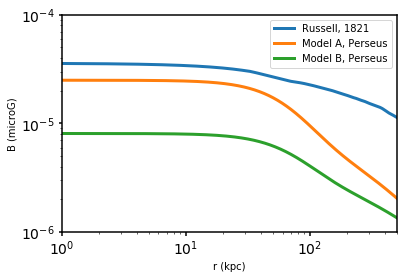

In [1]:
%matplotlib inline
from alpro import models, util
import numpy as np 
import matplotlib.pyplot as plt 
util.set_default_plot_params()
r = np.logspace(0,3,num=1000)

russell = models.ClusterProfile(model="russell")
modA = models.ClusterProfile(model="a")
modB = models.ClusterProfile(model="b")

plt.plot(r, russell.get_B(r), label="Russell, 1821")
plt.plot(r, modA.get_B(r), label="Model A, Perseus")
plt.plot(r, modB.get_B(r), label="Model B, Perseus")
plt.loglog()
plt.ylabel("B (microG)")
plt.xlabel("r (kpc)")
plt.ylim(1e-6,1e-4)
plt.xlim(1,500)
plt.legend()

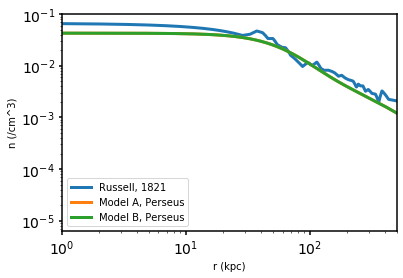

In [2]:
plt.plot(r, russell.density(r), label="Russell, 1821")
plt.plot(r, modA.density(r), label="Model A, Perseus")
plt.plot(r, modB.density(r), label="Model B, Perseus")
plt.loglog()
plt.ylabel("n (/cm^3)")
plt.xlabel("r (kpc)")
#plt.ylim(1e-6,1e-4)
plt.xlim(1,500)
l = plt.legend()

Libanov \& Troitsky use the following field solution
$$
B_{r}=2\cos\theta f(r_{1})/r_{1}^{2},
$$

$$
B_{\theta}=-\sin\theta f'(r_{1})/r_{1},
$$

$$
B_{\phi}=\alpha\sin\theta f(r_{1})/r_{1},
$$
where

$$
f=C \left(\alpha \cos(\alpha r_{1})- \sin(\alpha r_{1})/r_{1} \right) - F_{0}
r_{1}^{2}/\alpha^{2}
$$

$$
F_{0}= C \alpha^{2} \left(\alpha \cos\alpha - \sin\alpha   \right),
$$

Here, $\alpha$ is the lowest nonzero root of $\tan\alpha=3\alpha/(3-\alpha^{2})$, $r_{1}\equiv r/R$ for the cavity radius $R$ and $C$ is the normalization constant determined by the field value at $r=0$.

8.30279480163158e-06
5114.477425315759


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


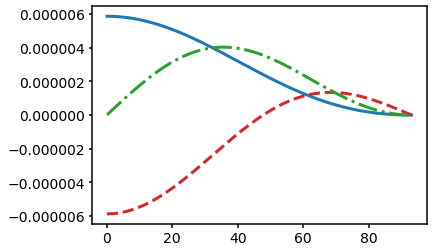

In [3]:
def fterm(r, C, alpha):
    term1 = -alpha * np.cos(alpha * r)
    term2 = np.sin(alpha * r) / r
    F0 = C * alpha * alpha * (alpha * np.cos(alpha) - np.sin(alpha))
    term3 = F0 * r * r / alpha / alpha
    f = C * (term1 + term2) + term3
    return f

def fprime(r, C, alpha):
    term1 = alpha * alpha * np.sin(alpha * r)
    term2 = (alpha * np.cos(alpha * r) / r) - (np.sin(alpha * r) / r / r)
    F0 = C * alpha * alpha * (alpha * np.cos(alpha) - np.sin(alpha))
    term3 = 2.0 * F0 * r / alpha / alpha
    f = C * (term1 + term2) + term3
    return f
    
    
# print (alpha_func(np.pi * 1.83455))
# alpha = np.linspace(1.834 * np.pi, 1.835 * np.pi, 1000000)
# plt.plot(alpha/np.pi, np.fabs(alpha_func(alpha)))
# plt.semilogy()
# #plt.ylim(-0.2,0.2)
# plt.xlim(1.834,1.835)
def libanov_field(r, theta=np.pi/4, Rcavity=93.0, alpha=5.76, C=1.0):
    rnorm = r/Rcavity
    fr = fterm(rnorm, C, alpha)
    Br = 2.0 * np.cos(theta) * fr / rnorm / rnorm
    Btheta = -np.sin(theta) * fprime(rnorm, C, alpha) / rnorm
    Bphi = alpha * np.sin(theta) * fr / rnorm
    return (Br, Btheta, Bphi)

r = np.linspace(0,93,1000)

thetas = np.linspace(0,np.pi,9)
thetas = [np.pi/4]
for i,theta in enumerate(thetas):
    #plt.subplot(3,3,i+1)
    Br, Btheta, Bphi = libanov_field(r, theta=theta, C=6e-8)
    plt.plot(r, Br, c="C0", ls="-")
    plt.plot(r, Btheta, c="C3", ls="--")
    plt.plot(r, Bphi, c="C2", ls="-.")
    Bperp = np.sqrt(Btheta**2 + Bphi**2)
    #plt.plot(r, Bperp, c="C1")

B0 = np.sqrt(Br**2 + Btheta**2 + Bphi**2)
print (B0[1])

#print (5.76,1.83455*np.pi)

# plt.figure()
# x = np.linspace(-93,93,1000)
# y = np.linspace(-93,93,1000)
# xx, yy = np.meshgrid(x, y)
# r = np.sqrt(xx **2 + yy*2)
# theta = np.arctan2(yy,xx)
# Br, Btheta, Bphi = libanov_field(r, theta=theta, C=6e-8)
# Bperp = np.sqrt(Btheta** + Bphi**2)
# plt.contourf(xx,yy,Br)
# #Br, Btheta, Bphi =

from alpro.models import FieldModel
mod = FieldModel(None)
# plt.figure()
mod.create_libanov_field(density="churasov")
#plt.plot(mod.r, mod.Bz, c="C0", ls="-", lw = 5, alpha=0.5)
#plt.plot(mod.r, mod.Bx, c="C3", ls="--", lw = 5, alpha=0.5)
#plt.plot(mod.r, mod.By, c="C2", ls="-.", lw = 5, alpha=0.5)

rm = mod.get_rm()
print (np.fabs(rm))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


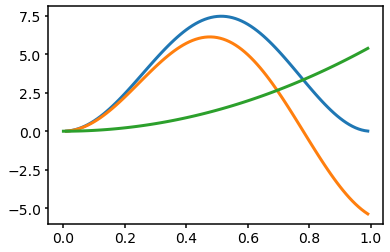

In [4]:
def fterm(r, C, alpha):
    term1 = -alpha * np.cos(alpha * r)
    term2 = np.sin(alpha * r) / r
    F0 = C * alpha * alpha * (alpha * np.cos(alpha) - np.sin(alpha))
    term3 = F0 * r * r / alpha / alpha
    f = C * (term1 + term2) + term3
    return f, C * (term1 + term2), term3
    #return f, C * (term1 + term2), term3

plt.figure()
r = np.arange(0,1,0.01)
f, term1, term2 = fterm(r, 1, 5.76)
plt.plot(r, f)
plt.plot(r, term1)
plt.plot(r, term2)